<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [12]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 2: Generate Descriptive Statistics and Visualizations

## Q1: For the "Median value of owner-occupied homes" provide a boxplot

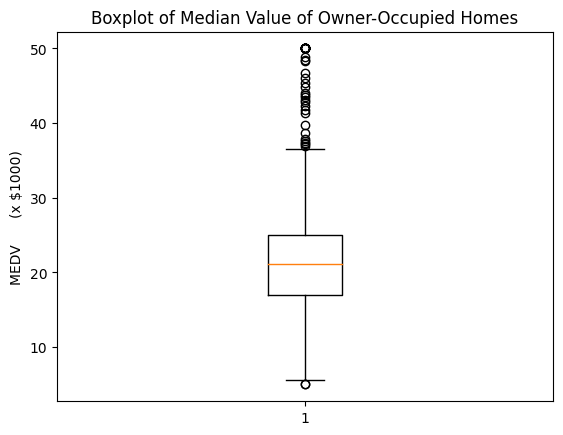

In [20]:
plt.boxplot(boston_df["MEDV"])
plt.ylabel("MEDV      (x $1000)")
plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.show()

## Q2：Provide a  bar plot for the Charles river variable

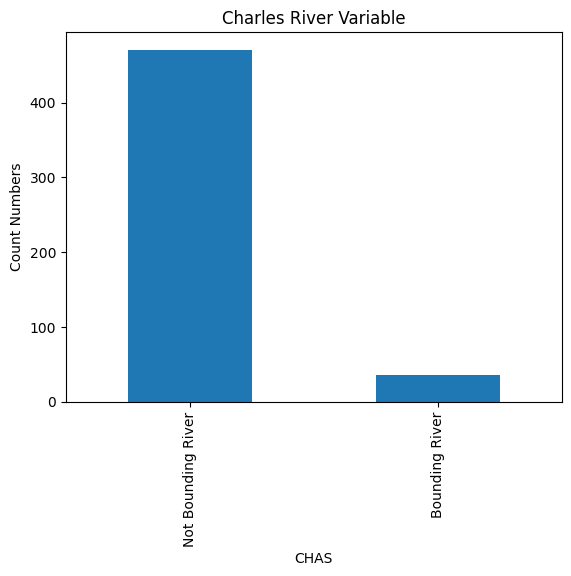

In [21]:
bo = boston_df["CHAS"].value_counts()
bo.plot(kind="bar")
plt.title("Charles River Variable")
plt.xlabel("CHAS")
plt.ylabel("Count Numbers")
plt.xticks([0, 1], ['Not Bounding River', 'Bounding River'])
plt.show()

## Q3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

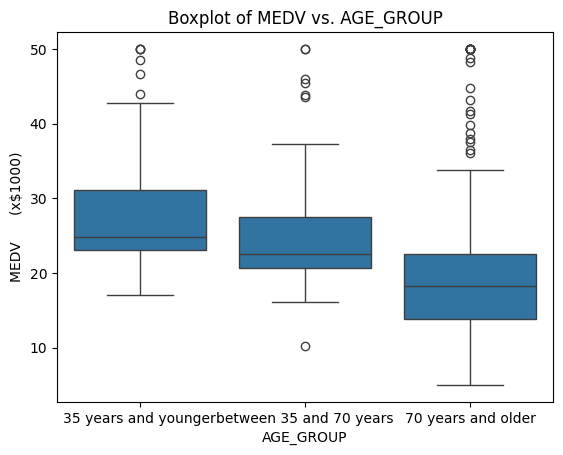

In [25]:
h_bins = [0, 35, 70, float('inf')]
h_labels = ["35 years and younger", 
          "between 35 and 70 years", 
          "70 years and older"]
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], 
                                bins=h_bins,
                                labels=h_labels)
#plot fig
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title("Boxplot of MEDV vs. AGE_GROUP")
plt.xlabel("AGE_GROUP")
plt.ylabel("MEDV      (x$1000)")
plt.show()

## Q4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

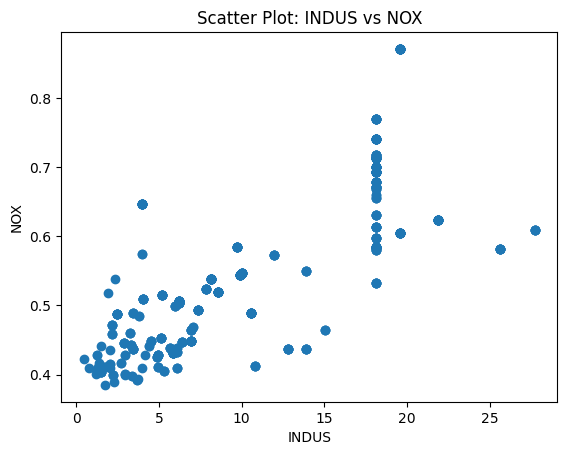

In [26]:
plt.scatter(boston_df["INDUS"], boston_df["NOX"])
plt.title("Scatter Plot: INDUS vs NOX")
plt.xlabel("INDUS")
plt.ylabel("NOX")
plt.show()

## Q5:Create a histogram for the pupil to teacher ratio variable

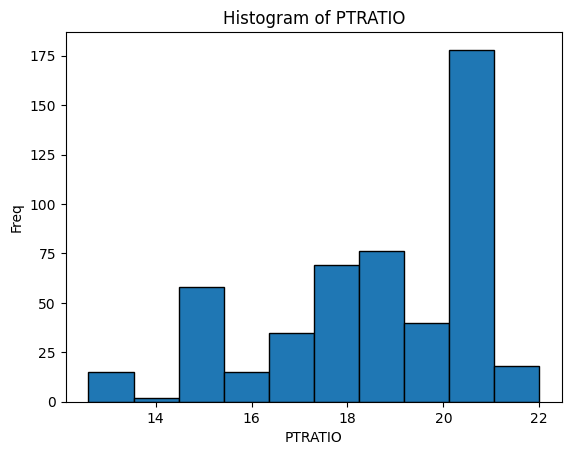

In [27]:
plt.hist(boston_df["PTRATIO"], bins=10, edgecolor='k')
plt.title("Histogram of PTRATIO")
plt.xlabel("PTRATIO")
plt.ylabel("Freq")
plt.show()

# Task 3: Use the appropriate tests to answer the questions provided.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

## A1
## H.0: There's no significant difference in the median values of houses bounded by the Charles river and those not bounded by the Charles river;
## H.1:  Thre'ss a significant difference in the median values of houses bounded by the Charles river and those not bounded by the Charles river.

In [36]:
import scipy.stats as stats
charles_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
non_charles_river = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_statistic, p_value = stats.ttest_ind(charles_river, 
                                       non_charles_river)
alpha = 0.05
if p_value < alpha:
    print("Reject H0 ")
    print("Result is: There is a significant difference in median values.")
else:
    print("Fail to reject H0 ")
    print("Result is: There is no significant difference in median values.")

Reject H0 
Result is: There is a significant difference in median values.


# A2:

## H.0: There is no significant difference in median values of houses among different age groups
## H.1: There is a significant difference in median values of houses among different age groups

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('MEDV ~ AGE_GROUP', data=boston_df).fit()
an_table = sm.stats.anova_lm(model, typ=2)

alpha = 0.05

if an_table['PR(>F)'][0] < alpha:
    print("Reject H0")
    print("Result is:There is a significant difference in median values among different age groups.")
else:
    print("Fail to reject H0")
    print("Result is:There is no significant difference in median values among different age groups.")

Reject H0
Result is:There is a significant difference in median values among different age groups.


## A3:

## H.0: There is no significant relationship (correlation) between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).
## H.1: There is a significant relationship (correlation) between NOX and INDUS.

In [38]:
correlation_coeff, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
alpha = 0.05
if p_value < alpha:
    print("Reject H0")
    print("Result is: There is a significant relationship between NOX and INDUS.")
else:
    print("Fail to reject H0")
    print("Result is: There is no significant relationship between NOX and INDUS.")

Reject H0
Result is: There is a significant relationship between NOX and INDUS.


## A4:

## H.0: An additional weighted distance to the five Boston employment centers has no impact on the median value of owner-occupied homes (β = 0)
## H.1: An additional weighted distance to the five Boston employment centers has an impact on the median value of owner-occupied homes (β ≠ 0)

In [39]:
import statsmodels.api as sm
x_ = sm.add_constant(boston_df['DIS']) 
y_ = boston_df['MEDV']  
model = sm.OLS(y_, x_).fit()
summary = model.summary()
alpha = 0.05
if model.pvalues['DIS'] < alpha:
    print("Reject H0")
    print("Result is: An additional weighted distance to the employment centers has an impact on median home value")
else:
    print("Fail to reject H0")
    print("Result is: There is no significant impact of an additional weighted distance on median home value")
print(summary)

Reject H0
Result is: An additional weighted distance to the employment centers has an impact on median home value
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        20:12:35   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------